# **Assignment 1 - MOBILE TEST**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [14]:
data = pd.read_csv('/content/drive/MyDrive/assignmentsfor3sessions/Mobiletrain.csv')

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [17]:
X = data.drop('price_range', axis=1)
y = data['price_range']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [19]:
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 1.3550 - accuracy: 0.3338 - val_loss: 1.2109 - val_accuracy: 0.4625
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0438 - accuracy: 0.5863 - val_loss: 0.9245 - val_accuracy: 0.6325
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7492 - accuracy: 0.7400 - val_loss: 0.6892 - val_accuracy: 0.7450
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.8294 - val_loss: 0.5228 - val_accuracy: 0.7975
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.8750 - val_loss: 0.4420 - val_accuracy: 0.8175
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.9131 - val_loss: 0.3749 - val_accuracy: 0.8425
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.9356 - val_loss: 0.3290 - val_accuracy: 0.8675
Epoch 8/100
5

In [23]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
50/50 [==============================] - 0s 5ms/step - loss: 4.0702e-04 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.9150
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 3.9477e-04 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.9125
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 3.8444e-04 - accuracy: 1.0000 - val_loss: 0.3209 - val_accuracy: 0.9150
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 3.6592e-04 - accuracy: 1.0000 - val_loss: 0.3218 - val_accuracy: 0.9150
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 3.5339e-04 - accuracy: 1.0000 - val_loss: 0.3237 - val_accuracy: 0.9150
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 3.3846e-04 - accuracy: 1.0000 - val_loss: 0.3237 - val_accuracy: 0.9150
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 3.2575e-04 - accuracy: 1.0000 - val_loss: 0.3251 - val_ac

In [24]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:',accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.9125
Test Loss: 0.4443291127681732
Test Accuracy: 0.9125000238418579


# **Assignment 2 - FASHION MNIST**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train = X_train / 255.0
X_test =X_test / 255.0


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5055 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3837 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3442 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3193 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3013 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2874 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2735 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2644 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2562 - accuracy: 0.9046
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.246

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.3491 - accuracy: 0.8830 - 940ms/epoch - 3ms/step
Test accuracy: 0.8830000162124634


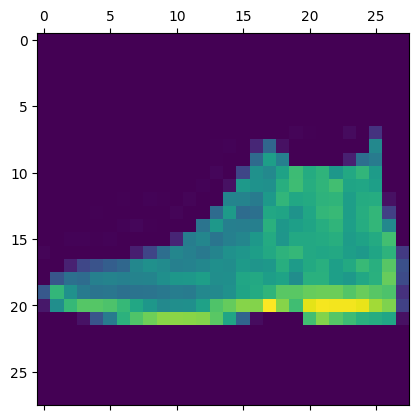

In [ ]:
plt.matshow(X_test[0])

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8830


[0.34911349415779114, 0.8830000162124634]

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


# **Assignment 3 - PALMERPENGUINS**


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
# Load the palmerpenguins dataset
data = pd.read_csv('/content/drive/MyDrive/assignmentsfor3sessions/penguins.csv')

In [ ]:
data = data.dropna()

In [ ]:
# Convert categorical variables to numerical
data['species'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

In [ ]:
# Normalize the numerical features
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    (data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] - data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()) / data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].std()

In [ ]:
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4351 - val_loss: nan - val_accuracy: 0.4074
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: na

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4627
Test accuracy: 0.46268656849861145


In [ ]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


# **Assignment 4 - HEART**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [ ]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
X = data.drop('output', axis=1)
y = data['output']

In [ ]:
X = (X - X.mean()) / X.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 1s 44ms/step - loss: 0.7396 - accuracy: 0.4378 - val_loss: 0.6470 - val_accuracy: 0.7600
Epoch 2/50
7/7 [==============================] - 0s 21ms/step - loss: 0.6402 - accuracy: 0.6959 - val_loss: 0.5670 - val_accuracy: 0.8800
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5718 - accuracy: 0.7558 - val_loss: 0.5088 - val_accuracy: 0.9200
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5185 - accuracy: 0.7834 - val_loss: 0.4617 - val_accuracy: 0.8800
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4722 - accuracy: 0.8018 - val_loss: 0.4250 - val_accuracy: 0.8800
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4358 - accuracy: 0.8249 - val_loss: 0.3974 - val_accuracy: 0.8800
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4061 - accuracy: 0.8433 - val_loss: 0.3768 - val_accuracy: 0.8400
Epoch 8/50
7/7 [============

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.6266 - accuracy: 0.8361
Test accuracy: 0.8360655903816223


In [ ]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step
